In [1]:
push!(LOAD_PATH,pwd())
using ProfileView
using constants
using types10
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")

kltSA (generic function with 1 method)

In [2]:
Eoff=5.0
Ts=collect(300.0:10.0:900.0)
######################################################################################
##for Liu x=0.6 best fit x=0.635 N=-1.45e20
######################################################################################
numofn=[-3.0e18]#,-1.22e18,-1.02e18,-0.94e18]#-9.5e19,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
numofnn=[1e17]#,1e18,1e18,1e18]
#Sample 3 -1.75e20, Sample Sb 0.75% -1.03e20, #
xs=[0.6]#,0.8,0.7,0.61]#collect(0.0:0.01:1.0)
Es=collect(0.0:0.1:3.0)

var0=[Ts[1],xs[1]]

EX3(var)=Eoff#+Egx3(var[1],var[2])
EX1(var)=Ec0(var[2])+EX3(var)
ELH(var)=Eoff-Egx3(var[1],var[2])
EHH(var)=Eoff-Egx3(var[1],var[2])

effMassX1(var)=X1effMass(var[1])*me
effMassX3(var)=0.38*me
effMassLH(var)=-1.0*me
effMassHH(var)=-1.5*me

alphaX1(var)=0.0#EX1(var0)
alphaX3(var)=0.0#EX1(var0)
alphaLH(var)=0.0#EX3(var0)
alphaHH(var)=0.0#EX3(var0)

function Da(band::parBandTx,x::Float64)
    Da=7.0#9.0-1.5*x*x
    Dv=1.0
    if band==bandX3 ||  band==bandX1
        return Da
    end
    if band==bandHH ||  band==bandLH
        return Dv
    end
end

bandX3=parBandTx(true,1.0,effMassX3(var0),alphaX3(0.0),EX3(var0),[EX3],[effMassX3],[alphaX3],var0)
bandX1=parBandTx(true,1.0,effMassX1(var0),alphaX1(0.0),EX1(var0),[EX1],[effMassX1],[alphaX1],var0)
bandHH=parBandTx(true,1.0,effMassHH(var0),alphaHH(0.0),EHH(var0),[EHH],[effMassHH],[alphaHH],var0)
bandLH=parBandTx(true,1.0,effMassLH(var0),alphaLH(0.0),ELH(var0),[ELH],[effMassLH],[alphaLH],var0)
bndstTx=BandStrucTx([bandLH,bandHH,bandX1,bandX1,bandX1,bandX3,bandX3,bandX3],var0)#
#bndstTx=BandStrucTx([bandLH,bandX1],var0)#

#vartau0=[bandC.effMass,Ts[1],Ec(var0),xs[1],Ec(var0),bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandV]
vartau0=[bandX3.effMass,Ts[1],EX1(var0),xs[1],EX1(var0),bandX3,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandLH]
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst
#tauAC(var)=tauAC_func(Cl(var[4]),acPhDa(var[4]),var[2],var[1],var[3],var[6])
tauAC(var)=tauAC_func(Cl(var[4]),Da(var[6],var[4]),var[2],var[1],var[3],var[6])
tauPOP(var)=tauPOP_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1]
,var[3],tauPOPIIint(var[5],var[2],var[4],var[6]),var[7],opPhE(var[4]),var[8])
tauPOP2(var)=tauPOP2lowN_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauPOP3(var)=tauPOP3_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauII2(var)=tauII2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[7],var[1],var[3],var[8])
tauNI(var)=tauNI_func(epsilon0_x(var[4]),var[1],var[9])
tauTOTTx=tau_electron_B([tauAC,tauII2,tauNI,tauPOP3],vartau0)#,tauII2,tauPOP2,tauPOP3

xmax=3.0

3.0

In [3]:
@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis,sigmaes,sigmahs,seebeckes,seebeckhs)=electronicPropsiso(bndstTx,xs,Ts,numofn,numofnn,tauTOTTx,xmax)
x=3.0

 40.914921 seconds (188.84 M allocations: 38.943 GiB, 11.11% gc time)


3.0

In [4]:
foreach(x->println(Ts[x]," ",Efs[x,1,1,]-Eoff),1:length(Ts))

300.0 -0.04857792057782895
310.0 -0.0519103453527654
320.0 -0.0553048540367822
330.0 -0.058759411978385856
340.0 -0.062271905194831056
350.0 -0.06584004210458172
360.0 -0.06946120623457919
370.0 -0.07313224213123082
380.0 -0.07684915322032637
390.0 -0.08060668807909988
400.0 -0.08439779238664524
410.0 -0.08821291095221007
420.0 -0.0920391427385363
430.0 -0.09585928847054603
440.0 -0.09965089198087185
450.0 -0.10338546438042329
460.0 -0.10702818060179986
470.0 -0.11053840903495704
480.0 -0.11387140368880821
490.0 -0.11698127762976807
500.0 -0.11982497633700895
510.0 -0.12236651185847336
520.0 -0.12458045811351504
530.0 -0.12645385403709142
540.0 -0.1279861876196593
550.0 -0.12918773924171223
560.0 -0.13007687880809105
570.0 -0.1306772477832201
580.0 -0.13101514546544735
590.0 -0.13111750020727087
600.0 -0.13101045604889183
610.0 -0.1307184992041801
620.0 -0.13026399971676295
630.0 -0.12966704299032017
640.0 -0.12894544727246515
650.0 -0.12811488993086506
660.0 -0.1271890894876586
670.0 

In [5]:
plot(Ts,Efs[:,1,1]-Eoff,linestyle="-",marker="o",color="c")
#ylim(0,7)
grid()

MethodError: MethodError: no method matching -(::Array{Float64,1}, ::Float64)
Closest candidates are:
  -(!Matched::Float64, ::Float64) at float.jl:397
  -(!Matched::Complex{Bool}, ::Real) at complex.jl:298
  -(!Matched::Missing, ::Number) at missing.jl:93
  ...

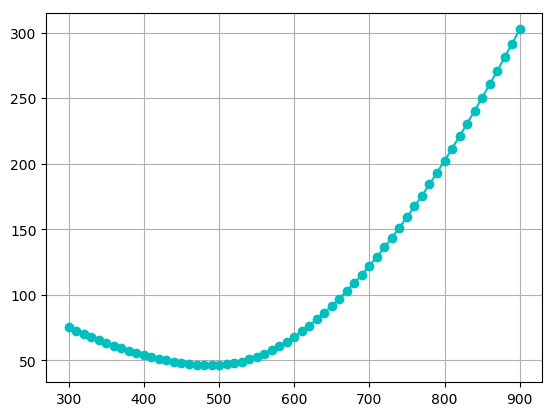

In [6]:
plot(Ts,sigmaes[:,1,1]/100,linestyle="-",marker="o",color="c")
#ylim(0,7)
grid()

In [7]:
Ts

61-element Array{Float64,1}:
 300.0
 310.0
 320.0
 330.0
 340.0
 350.0
 360.0
 370.0
 380.0
 390.0
 400.0
 410.0
 420.0
   ⋮  
 790.0
 800.0
 810.0
 820.0
 830.0
 840.0
 850.0
 860.0
 870.0
 880.0
 890.0
 900.0

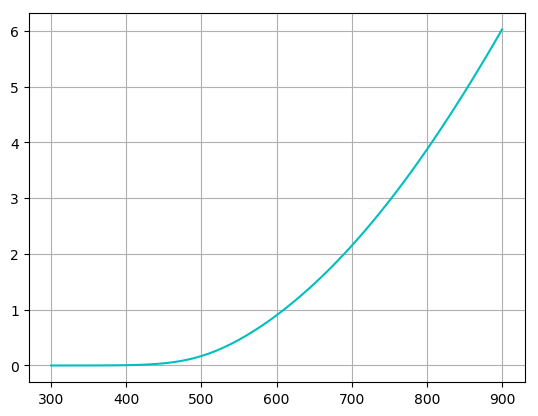

In [8]:
plot(Ts,kbis[:,1,1],linestyle="-",color="c")
#ylim(0,7)
grid()

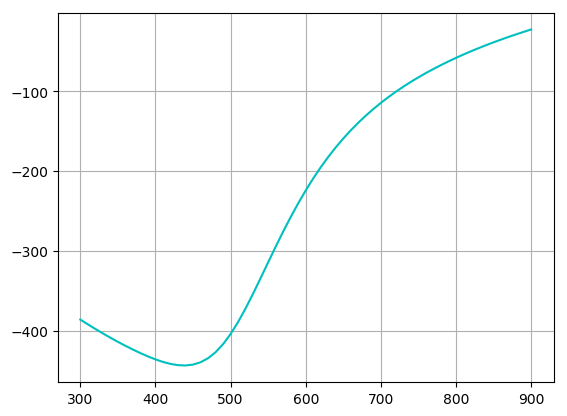

In [9]:
plot(Ts,seebecks[:,1,1]*1e6,linestyle="-",color="c")
#plot(Ts,seebeckes[:,1,1]*1e6,linestyle="-",color="y")
#plot(Ts,seebeckhs[:,1,1]*1e6,linestyle="-",color="k")
#ylim(-250,-0)
grid()

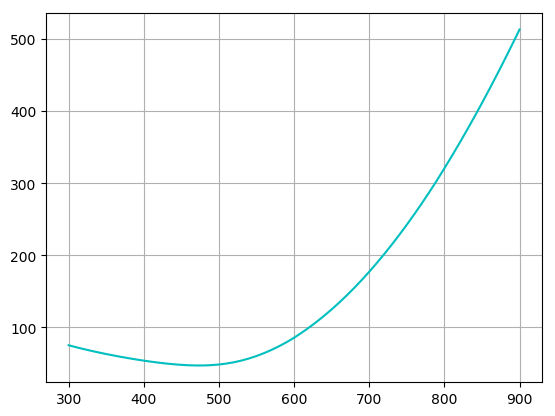

In [10]:
plot(Ts,sigmas[:,1,1]/100,linestyle="-",color="c")
#ylim(0,3500)
grid()

In [11]:
T_EF_Dict=Dict()
for (Ti,Tx) in enumerate(Ts)
    T_EF_Dict[Tx]=(Efs[Ti])    
end
T_EF_Dict_Array=Array{Dict{Float64,Float64},2}(undef,length(numofn),length(xs))
Dict_temp=Dict()
Efsr=Array{Float64,3}(undef,length(Ts),length(numofn),length(xs))
for (j,jn) in enumerate(numofn)
    for (k,kx) in enumerate(xs) 
        for (i,iT) in enumerate(Ts)
            Efsr[i,j,k]=Efs[i,j,k]-EX3(0.0)
            Dict_temp[iT]=Efsr[i,j,k]
            T_EF_Dict_Array[j,k]=Dict_temp 
        end
    end
end
#foreach(i->println("$i= ",Ts[i]),1:length(Ts))
#Efsr

In [12]:
#println("-1")
#############Lattice Thermal Conductivity Parameters###############

function klpar(con::Float64,p::Float64,NP::Float64)
    thetaL=52.3e12*hbar/kB # K 
    thetaT=29.7e12*hbar/kB  # K
    vL=(1-con)*7700+con*4900    # m/s
    vT=(1-con)*4900+con*3000    # m/s
    gammaL=2.5*(1-con)+1.7*con
    gammaT=2.5*(1-con)+1.7*con
    M=(2*(24.305e-3)+(28.0855e-3*(1-con)+118.71e-3*con))/3/Nav
    V=((1-con)*(6.39e-10)^3+con*(6.77e-10)^3)/12
    a=V^(1.0/3.0)
    ro=M/V
    Vdj=(((6.39e-10)^3)/((1-con)*(6.39e-10)^3+con*(6.77e-10)^3))^(1/3)
    jL=vL/7700*Vdj
    jT=vT/4900*Vdj
    thetaLx=thetaL*jL
    thetaTx=thetaT*jT
    ##########Boundary Scattering###############3
    D=11e-9
    #p=1.0
    ##########Alloy Scattering###################
    mbar=(28.0855*(1-con)+118.71*con)
    GammaSiSn=(1-con)*((28.0855-mbar)/mbar)^2+con*((118.71-mbar)/mbar)^2
    GammaMgSiSn=2*((mbar/(24.305+mbar))^2*GammaSiSn);         
    ##########Electron Scattering###################
    Eep=5.0*q
    xsp=xs[1]
    Tp=300.0
    mdx1=0.67*me
    mdx3=0.38*me
    Efx3=0.2589
    Efx1=0.2589
    ##########Nanoparticle Scattering###################
    #NP=0
    #alpha=1.0
    Rnp=1/2*15.0e-9#
    Vnp=4/3*pi*(Rnp)^3
    rhonp=NP/100/Vnp
    rhoM=3.0
    rhoT=3.78
    alphaNP=0.2289#1-exp(-1*(rhoT-rhoM)/rhoM);
#vartauPH0=[[0.02],Ts[1],gammaL,gammaT,xsp,thetaCLx,thetaCTx,thetaCTx,MSi,MGe,VSi,a,T_EF_Dict,0.0]
    Tsindex=1#25
    numberofnindex=1
    xsindex=1
    vartauPH0=[ [0.02],  Ts[1],   gammaL,  gammaT, con,#5
        thetaLx, thetaTx, thetaTx, M,   M, #10
        V, a, T_EF_Dict_Array, Eep, alphaNP, #15
        Rnp, thetaLx, thetaTx, vL, vT, #20
        vL, vT, p, NP,Tsindex,#25
        numberofnindex,xsindex,p,D,GammaMgSiSn,#30
        mdx1,mdx3,Efx1,Efx3,ro,#35,
        NP,alphaNP,Rnp,Vnp,rhonp #40
        ]  
    thetaCLx=thetaCL(vartauPH0[12],vartauPH0[5],vartauPH0[17],vartauPH0[19],vartauPH0[11])
    thetaCTx=thetaCT(vartauPH0[12],vartauPH0[5],vartauPH0[18],vartauPH0[19],vartauPH0[11])
    #println("2")
    tauPHNLf(var)=tauPH_NL(var[3],var[11],var[1],var[2],var[9],var[21])
    tauPHNTf(var)=tauPH_NT(var[4],var[11],var[1],var[2],var[9],var[22]) 

    tauPHULf(var)=tauPH_U(var[3],var[1],var[2],var[9],var[19],var[17])
    tauPHUTf(var)=tauPH_U(var[4],var[1],var[2],var[9],var[20],var[18])

    tauPHALLLf(var)=tauPH_ALL(var[30],var[11],var[1],var[2],var[19])
    tauPHALLTf(var)=tauPH_ALL(var[30],var[11],var[1],var[2],var[20])

    tauPHeLfX3(var)=tauPH_e(var[14],var[32],var[35],(var[13][var[26],var[27]])[var[2]],var[1],var[2],var[21])
    tauPHeTfX3(var)=tauPH_e(var[14],var[32],var[35],(var[13][var[26],var[27]])[var[2]],var[1],var[2],var[22])

    tauPHeLfX1(var)=tauPH_e(var[14],X1effMass(var[2])*me,var[35],(var[13][var[26],var[27]])[var[2]]-Ec0(0.6)
        ,var[1],var[2],var[21])
    tauPHeTfX1(var)=tauPH_e(var[14],X1effMass(var[2])*me,var[35],(var[13][var[26],var[27]])[var[2]]-Ec0(0.6)
        ,var[1],var[2],var[22])

    tauPHBLf(var)=tauPH_B(var[19],var[28],var[29])
    tauPHBTf(var)=tauPH_B(var[20],var[28],var[29])
    #println("3")

    tauPHNPLf(var)=tauPH_NP(var[37],var[40],var[38],var[1],var[2],var[19])
    tauPHNPTf(var)=tauPH_NP(var[37],var[40],var[38],var[1],var[2],var[20])

    tauPHTOTL=tau_phonon_B([tauPHNLf,tauPHULf,tauPHBLf,tauPHALLLf,tauPHeLfX3,tauPHeLfX1,tauPHNPLf],vartauPH0)#,tauPHNPLf,tauPHALLLf,tauPHeLf,tauPH_eLf ,tauPHALLLf ,tauPHBLf,,tauPHULf
    tauPHNL=tau_phonon_B([tauPHNLf],vartauPH0)
    tauPHRL=tau_phonon_B([tauPHULf,tauPHBLf,tauPHALLLf,tauPHeLfX3,tauPHeLfX1,tauPHNPLf],vartauPH0) #,tauPHNPLf,tauPHALLLf,tauPHeLf,tauPHALLLf,tauPH_eLf] ,tauPHBLf

    tauPHTOTTx=tau_phonon_B([tauPHNTf,tauPHUTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHBTf,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf ,tauPHBTf
    tauPHNTx=tau_phonon_B([tauPHNTf],vartauPH0)
    tauPHRTx=tau_phonon_B([tauPHUTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHBTf,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf ,tauPHBTf#

    tauPHTOTTy=tau_phonon_B([tauPHNTf,tauPHUTf,tauPHBTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf tauPHBTf
    tauPHNTy=tau_phonon_B([tauPHNTf],vartauPH0)
    tauPHRTy=tau_phonon_B([tauPHUTf,tauPHBTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPH_eTf ,tauPHBTf,tauPHALLTf,tauPHeTf
    #println("4")
    tauPHL=[tauPHTOTL,tauPHNL,tauPHRL]
    tauPHTx=[tauPHTOTTx,tauPHNTx,tauPHRTx]
    tauPHTy=[tauPHTOTTx,tauPHNTx,tauPHRTx]
    return (vartauPH0,tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,tauPHL,tauPHTx,tauPHTy)
end
xmax=1.0

1.0

In [13]:
(vartauPH0,tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,tauPHL,tauPHTx,tauPHTy)=klpar(0.6,0.65,0.0)
klsM=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
for (iT,iTx) in enumerate(Ts)    
   (IL1,ITx1,IL2,ITx2,IL3,ITx3,kL,kTx,kTy,klsM[iT,1,1])= klt(tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,
        tauPHRTy,iTx,[vartauPH0[21],vartauPH0[22],vartauPH0[22]])
    #println("T=", iTx, " kl= " ,round(klsM[iT,1,1]*10000)/10000)
   # println("IL1= ",IL1," IL2= ",IL2," IL3= ",IL3," ITx1= ",ITx1," ITx2= ",ITx2," ITx3= ",ITx3," kL/3=",kL,    " kTx/3=",kTx," kTy/3=",kTy)
end

In [14]:
foreach(x->println(klsM[x,1,1]),1:length(Ts))

0.8541996313970371
0.8374640461561377
0.821371907547754
0.8059128100213279
0.7910738093309151
0.7768399471162409
0.7631946802407178
0.7501202398913467
0.7375979371538636
0.7256084261362461
0.7141319320001149
0.7031484489043849
0.6926379114389402
0.6825803423125767
0.6729559786303357
0.6637453788818855
0.6549295126316997
0.6464898347422835
0.6384083456930115
0.6306676391674566
0.6232509376737835
0.6161421167397323
0.6093257183636288
0.6027869548783306
0.5965117049332389
0.5904865035504159
0.5846985279263865
0.5791355807691336
0.5737860716591083
0.5686389971997453
0.5636839202436448
0.5589109484285902
0.5543107122277412
0.5498743427122487
0.5455934492199038
0.5414600971122682
0.537466785784842
0.5336064270725059
0.5298723241684787
0.5262581511513981
0.5227579331931806
0.5193660275007114
0.5160771050274066
0.5128861329762888
0.5097883581041728
0.506779290826756
0.5038546901164375
0.5010105491784317
0.4982430818858321
0.4955487099505938
0.49292405080468277
0.49036590616374326
0.48787125124

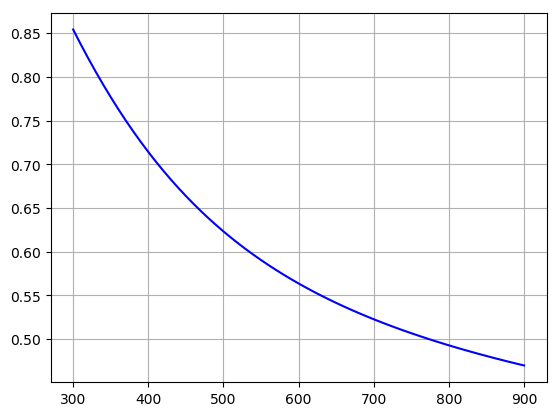

In [15]:
plot(Ts,klsM[:,1,1],linestyle="-",color="b")
grid()

In [16]:
(vartauPH0,tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,tauPHL,tauPHTx,tauPHTy)=klpar(0.0,0.65,0.0)
kls0=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
for (iT,iTx) in enumerate(Ts)    
   (IL1,ITx1,IL2,ITx2,IL3,ITx3,kL,kTx,kTy,kls0[iT,1,1])= klt(tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,iTx,[vartauPH0[21],vartauPH0[22],vartauPH0[22]])
    #println("T=", iTx, " kl= " ,round(kls0[iT,1,1]*10000)/10000)
    #println("IL1= ",IL1," IL2= ",IL2," IL3= ",IL3," ITx1= ",ITx1," ITx2= ",ITx2," ITx3= ",ITx3," kL/3=",kL,    " kTx/3=",kTx," kTy/3=",kTy)
end

In [17]:
foreach(x->println(kls0[x,1,1]),1:length(Ts))

5.761504531260077
5.615937771086632
5.475997540694537
5.341515883617077
5.212306550692604
5.088172216016999
4.968909895864875
4.854314989209877
4.744184260270227
4.638318008983997
4.536521618608686
4.43860662637747
4.344391430082513
4.253701718166425
4.16637069155054
4.082239130583075
4.001155348969257
3.922975067306364
3.847561230982635
3.7747837901050603
3.7045194527814043
3.636651418177092
3.571069093213474
3.507667796782132
3.446348456925968
3.3870173076412455
3.329585590983267
3.273969271598945
3.2200887643066136
3.1678686769693063
3.1172375683385973
3.0681277201900614
3.0204749228848775
2.974218273505134
2.9292999857931146
2.885665211212596
2.843261870520376
2.8020404952857922
2.7619540788298362
2.72295793607941
2.6850095718508022
2.6480685570929956
2.612096412637506
2.5770565000181196
2.5429139189412884
2.5096354110061836
2.477189269292155
2.4455452534504887
2.4146745099563693
2.3845494971960925
2.355143915083056
2.3264326389142327
2.298391657196272
2.2709980131870986
2.24422974

In [18]:
(vartauPH0,tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,tauPHL,tauPHTx,tauPHTy)=klpar(1.0,0.5,0.0)
kls1=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
for (iT,iTx) in enumerate(Ts)    
   (IL1,ITx1,IL2,ITx2,IL3,ITx3,kL,kTx,kTy,kls1[iT,1,1])= klt(tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,iTx,[vartauPH0[21],vartauPH0[22],vartauPH0[22]])
   # println("T=", iTx, " kl= " ,round(kls1[iT,1,1]*10000)/10000)
   # println("IL1= ",IL1," IL2= ",IL2," IL3= ",IL3," ITx1= ",ITx1," ITx2= ",ITx2," ITx3= ",ITx3," kL/3=",kL,    " kTx/3=",kTx," kTy/3=",kTy)
end

In [19]:
foreach(x->println(kls1[x,1,1]),1:length(Ts))

3.3263610068926615
3.2742150036302102
3.2233958962300684
3.1738877571907484
3.1256688285949266
3.0787130706952044
3.0329913712827
2.9884724905933164
2.9451237991304553
2.902911852694217
2.861802838994931
2.8217629226944414
2.782758509986239
2.7447564494784036
2.7077241828725644
2.6716298564880265
2.6364424028211526
2.602131599779844
2.568668113678792
2.5360235302715797
2.5041703760382052
2.4730821300628683
2.442733225812419
2.4130990423887817
2.3841558861213006
2.3558809646871306
2.3282523560772628
2.3012489763792785
2.2748505468353866
2.2490375619106815
2.223791258630228
2.1990935872231003
2.174927182964107
2.1512753390779085
2.128121980595727
2.1054516390923985
2.0832494282634166
2.0615010203233157
2.0401926232186636
2.019310958653887
1.9988432409284798
1.9787771565819685
1.9591008448396094
1.9398028788480548
1.9208722476868028
1.9022983391379995
1.8840709231947514
1.8661801362859967
1.8486164661945157
1.8313707376436745
1.8144340985277898
1.7977980067607493
1.7814542177175199
1.7653

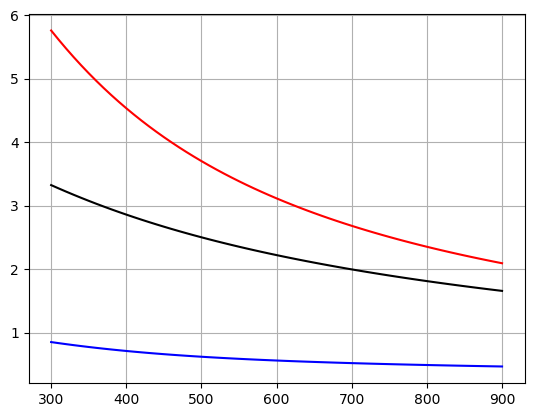

In [20]:
plot(Ts,klsM[:,1,1],linestyle="-",color="b")
plot(Ts,kls0[:,1,1],linestyle="-",color="r")

plot(Ts,kls1[:,1,1],linestyle="-",color="k")
grid()

In [21]:
yaa=0.6
aMgSi=6.39e-10
aMgSn=6.77e-10

6.77e-10

In [22]:
ks=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
klsT=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
f=0.55
for (iT,iTx) in enumerate(Ts)  
    klsT[iT,1,1]=(1-f)*klsM[iT,1,1]+f*(kls1[iT,1,1]*(1-yaa)aMgSn^3/((1-yaa)*aMgSn^3+yaa*aMgSi^3)+kls0[iT,1,1]*(yaa)aMgSi^3/((1-yaa)*aMgSn^3+yaa*aMgSi^3))
       ks[iT,1,1]=klsT[iT,1,1]+kes[iT,1,1]+kbis[iT,1,1,] 
    #println("T=", iTx, " kl= " ,round(klsT[iT,1,1]*10000)/10000)
    #println("IL1= ",IL1," IL2= ",IL2," IL3= ",IL3," ITx1= ",ITx1," ITx2= ",ITx2," ITx3= ",ITx3," kL/3=",kL,    " kTx/3=",kTx," kTy/3=",kTy)
end

In [23]:
MgSn_KL_T=[303.381209787804   ,404.509621648526   ,508.944674606021   ,609.64854815216    ,715.169193157614]
MgSn_KL_K=[ 7.16256157635468, 5.26108374384236, 4.14778325123153, 3.38916256157635, 2.89655172413793]

5-element Array{Float64,1}:
 7.16256157635468
 5.26108374384236
 4.14778325123153
 3.38916256157635
 2.89655172413793

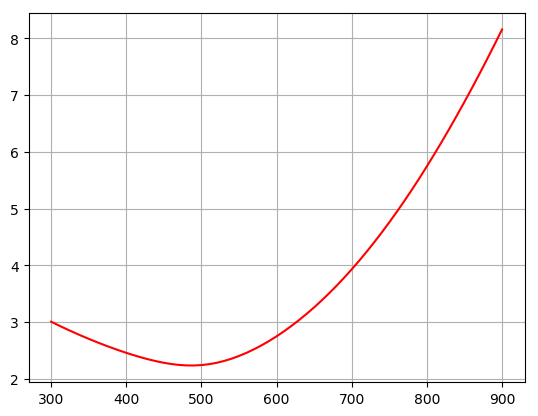

In [24]:
figure()
#semilogy(Ts,kls[:,1,1],linestyle="-",color="c")
#plot(Ts,kls0[:,1,1],linestyle="-",color="b")
#plot(Ts,kls1[:,1,1],linestyle="-",color="c")
#plot(Ts,klsM[:,1,1],linestyle="-",color="k")
plot(Ts,klsT[:,1,1]+kes[:,1,1]+kbis[:,1,1],linestyle="-",color="r")
#ylim(0,4.5)
grid(true)
#kes,kees,kehs,kbis

In [25]:
MgSiSn4hECE=[10,12.4,20.5,35.8,43.2,69.6,82.8,100,110]
MgSiSn2hECE=[3,4.4,8.5,15.8,22.2,55.6,50.8,68,80]
MgSiSn1hECE=[2,4.2,3.7,11.8,22.2,25.6,30.8,48,64]
MgSiSn0hECE=[1.6,1.7,3.8,7.8,12.2,25.6,40.8,68,62]

9-element Array{Float64,1}:
  1.6
  1.7
  3.8
  7.8
 12.2
 25.6
 40.8
 68.0
 62.0

In [26]:
MgSiSn4hKCT=[27.204980536447565,125.22263104569937,250.3986028902043, 300.61256865568174,350.4225990508186, 400.31661600810537,
450.60323681544304,500.88852450274595,550.37460672959,]
MgSiSn4hKCK=[ 2.8789473684210525, 2.7375, 2.609210526315789, 2.5121710526315786, 2.4184210526315786, 2.531907894736842, 2.614144736842105
, 2.6930921052631573, 2.7999999999999994]
MgSiSn2hKCT=[27.174994546327184, 125.66321921825845, 250.56521889830958, 300.8030294412153, 350.04276302458277,400.3366068836394, 
450.6409643790327, 500.95101524496823,550.7594666065552]
MgSiSn2hKCK=[2.608956937799043, 2.4846513157894736, 2.4523355263157893, 2.3861330409356722, 2.3131756578947367
, 2.385235380116959, 2.4832374999999995, 2.595288011695906, 2.697641746411483]
MgSiSn05hKCT=[26.1867119039,124.6184700145,249.7991072943,300.1809590466,349.8324946796,399.3641637338,450.1016014407,
450.7811561579,549.7232004091,500.4092678505]
MgSiSn05hKCK=[2.4217028509,2.3627326555,2.2459551435,2.1025076754,2.0223385167,2.2370652412,2.3803594498,2.302875,
2.5966549043,2.5105263158]
MgSiSn2h2TiO2KCT=[450.7811561579,26.5677491601,125.429931211,250.6172345758,300.4185996907,350.6278995361,
400.1639737642,500.3759398496,550.2639577668]
MgSiSn2h2TiO2KCK=[2.302875,2.3065789474,2.2490131579,2.1486842105,2.0335526316,1.925,2.1552631579,2.4282894737,
2.5269736842]
MgSiSn2h5TiO2KCT=[27.3549565403,124.5907321495,250.1753052845,299.9806697595,350.1926358449,400.1339785634,
450.0339945609,500.3299472084,550.6152348958]
MgSiSn2h5TiO2KCK=[2.2490131579,2.1782894737,2.0582236842,1.9529605263,1.8509868421,2.08125,2.2095394737,2.3148026316,
2.39375]
MgSiSn0hKCT=[26.9755694846,125.1437396683,250.3474884019,300.0735322348,349.8027683571,400.6191835973,449.916314723,
500.2366154749,550.052698235]
MgSiSn0hKCK=[2.1168755981,2.0268355263,1.9150855263,1.8140986842,1.7209888158,1.8544934211,1.9231644737,2.0605065789,
2.1816907895]

9-element Array{Float64,1}:
 2.1168755981
 2.0268355263
 1.9150855263
 1.8140986842
 1.7209888158
 1.8544934211
 1.9231644737
 2.0605065789
 2.1816907895

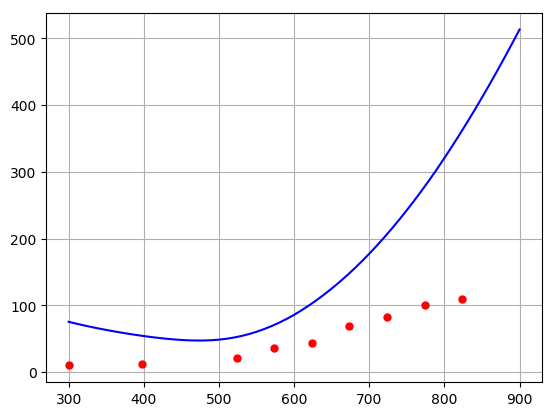

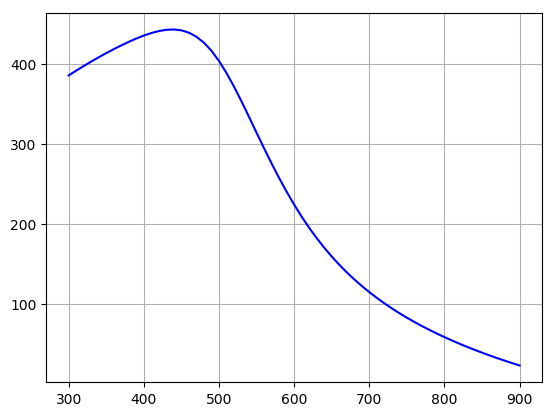

In [27]:

figure()
plot(Ts,sigmas[:,1,1]/100,linestyle="-",color="b")
#plot(Ts,sigmas[:,2,2]/100/6^(2/3),linestyle="-",color="r")
#plot(Ts,sigmas[:,3,3]/100/6^(2/3),linestyle="-",color="k")
#plot(Ts,sigmas[:,4,4]/100/6^(2/3),linestyle="-",color="g")
plot(MgSiSn4hKCT .+273,MgSiSn4hECE,linestyle="None",marker=".",markersize=10,color="r")
#plot(MgSiSn4hKCT .+273,MgSiSn2hECE,linestyle="None",marker=".",markersize=10,color="k")
#plot(MgSiSn4hKCT .+273,MgSiSn1hECE,linestyle="None",marker=".",markersize=10,color="b")
#plot(MgSiSn4hKCT .+273,MgSiSn0hECE,linestyle="None",marker=".",markersize=10,color="g")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Green_EC_E/100,linestyle="None",marker="x",markersize=2,color="g")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Blue_EC_E/100,linestyle="None",marker="o",markersize=2,color="b")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Pink_EC_E/100,linestyle="None",marker="o",markersize=2,color="r")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Black_EC_E/100,linestyle="None",marker="o",markersize=2,color="k")
grid()

figure()
plot(Ts,-seebecks[:,1,1]*1e6,linestyle="-",color="b")
#plot(Ts,-seebecks[:,2,2]*1e6,linestyle="-",color="r")
#plot(Ts,-seebecks[:,3,3]*1e6,linestyle="-",color="k")
#plot(Ts,-seebecks[:,4,4]*1e6,linestyle="-",color="g")
#plot(Ts,-seebecks[:,2,2]*1e6,linestyle="-",color="b")
#plot(SiGe_Vin_162_Bulk_SC_T,SiGe_Vin_162_Bulk_SC_S,linestyle="None",marker=".",markersize=10,color="r")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Green_SC_S,linestyle="None",marker="x",markersize=2,color="g")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Blue_SC_S,linestyle="None",marker="x",markersize=2,color="b")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Pink_SC_S,linestyle="None",marker="x",markersize=2,color="r")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Black_SC_S,linestyle="None",marker="x",markersize=2,color="k")
grid()

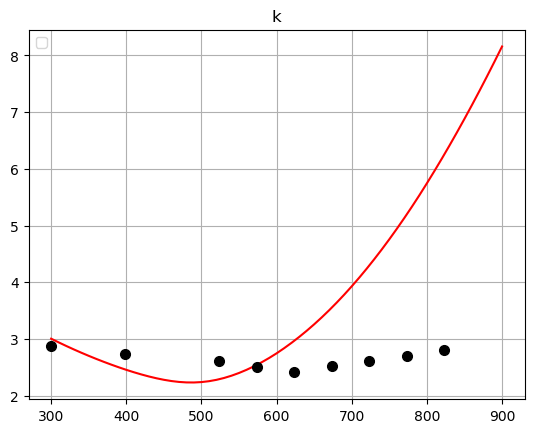

No handles with labels found to put in legend.


In [28]:
figure()
title("k")
plot(Ts,klsT[:,1,1]+kes[:,1,1]+kbis[:,1,1],linestyle="-",color="r")
#plot(Ts,klsT[:,1,1]+kes[:,1,1]+kbis[:,1,1],linestyle="-",color="r")
#plot(Ts,klsT[:,1,1]+kes[:,1,1]+kbis[:,1,1],linestyle="-",color="r")
#plot(Ts,klsT[:,1,1]+kes[:,1,1]+kbis[:,1,1],linestyle="-",color="r")
plot(MgSiSn4hKCT .+273,MgSiSn4hKCK,linestyle="None",marker="o",markersize=7,color="k")
#plot(MgSiSn2hKCT .+273,MgSiSn2hKCK,linestyle="None",marker="^",markersize=7,color="b")
#plot(MgSiSn05hKCT .+273,MgSiSn05hKCK,linestyle="None",marker="D",markersize=7,color="g")
#plot(MgSiSn2h2TiO2KCT  .+273,MgSiSn2h2TiO2KCK,linestyle="None",marker="8",markersize=7,color="tab:pink")
#plot(MgSiSn2h5TiO2KCT .+273,MgSiSn2h5TiO2KCK,linestyle="None",marker="*",markersize=7,color="tab:purple")
#plot(MgSiSn0hKCT .+273,MgSiSn0hKCK,linestyle="None",marker="s",markersize=7,color="r",label="4 h")
#plot(SiGe_SA_162_Bulk_KC_T,SiGe_SA_162_Bulk_KC_KL,linestyle="None",marker="o",markersize=7,color="b")
#plot(SiGe_SA_162_Bulk_KC_T2,SiGe_SA_162_Bulk_KC_K2,linestyle="None",marker="o",markersize=7,color="g")
legend(loc="upper left")
#ylim(1.5,5.0)
grid()

In [29]:
Ts

61-element Array{Float64,1}:
 300.0
 310.0
 320.0
 330.0
 340.0
 350.0
 360.0
 370.0
 380.0
 390.0
 400.0
 410.0
 420.0
   ⋮  
 790.0
 800.0
 810.0
 820.0
 830.0
 840.0
 850.0
 860.0
 870.0
 880.0
 890.0
 900.0

In [30]:
foreach(x->println(ks[x,1,1]),1:length(Ts))

3.0058837020758618
2.9408497651636902
2.8781282265092796
2.817679169658765
2.7594620890487573
2.703442839892589
2.649601361321369
2.5979406335597344
2.5484972650073967
2.5013539797722206
2.456654036614696
2.4146171778832177
2.3755627094791096
2.339907357162177
2.308186778692177
2.281054056443078
2.2592575030833144
2.243599435806749
2.2348709969343363
2.233770949754147
2.2408259584238723
2.2563353051238346
2.280358257398763
2.31274746827969
2.35321484750149
2.401407142478523
2.4569702688350907
2.519592776086369
2.5890264585173686
2.665089835046869
2.7476612020806086
2.837807712945163
2.9338516104767915
3.0360934029660838
3.144625357936651
3.259485717215693
3.380700763933902
3.5082905782052825
3.642269503541678
3.7826456803221453
3.9294205710754224
4.082588673102441
4.242137427588018
4.408047288521038
4.58029190944084
4.7588384119992195
4.943647708331515
5.134674856456535
5.331869433693647
5.535175917445152
5.745970713287813
5.961847862528422
6.183432333231276
6.410756690690332
6.6437852

In [36]:
foreach(x->println(sigmas[x,1,1]/100),1:length(Ts))

75.37885902747844
72.65914018490781
70.09278427131149
67.66818910126106
65.37536501039142
63.205953306434324
61.15333011982882
59.21280872844463
57.38195316739101
55.66101361577651
54.05348790773298
52.56680096959856
51.22002812922521
50.02604974622728
49.00711386198891
48.19465053493193
47.62588676386491
47.34349953928351
47.393887396950575
47.824505736571545
48.68065878317804
50.002384663900806
51.8221374006124
54.163747645072455
57.04271752413442
60.46751664754411
64.4414310502279
68.9642966985932
74.03402347910742
79.6476897822894
85.80224419230348
92.70861674934233
100.049793158827
107.88824954261501
116.24102075801994
125.1129312216576
134.50586106751916
144.42057380633767
154.85725632354624
165.81569955464573
177.2953559024381
189.29535103173265
201.8144796162577
214.8511972052361
228.40361328964377
242.46948753801757
257.0462297539123
272.1309034593723
287.7202327291632
303.8106118001706
320.63752356187484
337.80611139192166
355.42821307889903
373.51643645770645
392.07229945291

In [32]:
foreach(x->println(-seebecks[x,1,1]*1e6),1:length(Ts))

385.6257868627584
391.60158658160384
397.3739864626432
402.94691755417534
408.3213062416354
413.49332849687477
418.4520018720867
423.175917285803
427.62891212776094
431.75452808914
435.4692211417933
438.6545595857908
441.13291514017567
442.7032207101503
443.1053736364611
442.0258999287331
439.1236262196643
434.0631681087381
426.5660475054634
416.47110632674656
403.7882928975629
388.7260162409372
371.67801526841635
353.1705012254953
333.78602244662085
314.0874971054907
294.5615551142619
275.5882794285631
257.4354840646544
240.26944878758079
224.17381312551126
209.07320677676913
195.10968016982739
182.19004022111892
170.23642160930964
159.1715968525823
148.91882066137265
139.40406765792054
130.55767475696328
122.3152583727617
114.61808107740832
107.41304871821889
100.65247859325089
94.29373831312961
88.29882244831443
82.63391032305684
77.26893174640671
72.17715624066543
67.33481391344986
62.72075135320857
58.29442394036604
54.07564369982632
50.03815295986116
46.166630470286584
42.4482646

In [37]:
foreach(x->println(kes[x,1,1]),1:length(Ts))

0.044923551425272386
0.04474093227702497
0.04451465781281572
0.04425164474172292
0.043958288530758206
0.04364068114867942
0.04330489739341172
0.04295736826406366
0.04260536280057751
0.042257600693716625
0.04192501509625954
0.04162167571749398
0.04137168097506224
0.04119513168250333
0.04112108063439515
0.04118838521602122
0.04144355246571144
0.04194102203695514
0.04274208849250206
0.04391269892509635
0.04552037832799394
0.047630844462326696
0.050305049381902806
0.05359727103589251
0.05755450497897385
0.06221699262879202
0.06761953161344361
0.07379290523932328
0.08076529213913003
0.08856337070241244
0.09721309573166653
0.10704613342854868
0.11765033044082662
0.12913682964419382
0.14155606566200452
0.15494160846549832
0.1693228921840526
0.18472773209344595
0.20118308073124458
0.21871528803391593
0.23735018628458693
0.25711310604433457
0.2780288643546789
0.30012174293834293
0.3234154644176057
0.3479331701993651
0.3736974015912271
0.4007300846833315
0.4290525190207888
0.4586853698451041
0.4

In [38]:
foreach(x->println(kbis[x,1,1]),1:length(Ts))

1.8380215493851337e-5
3.79994086032906e-5
7.528668084094715e-5
0.00014349094203942202
0.0002639655544550583
0.000470074056677939
0.0008124772157964887
0.0013660858651870136
0.002238934198985598
0.0035831305725584944
0.005607827623687955
0.00859374666182851
0.01290900721932291
0.019020762407617502
0.027503599948178897
0.039037086369059205
0.05438568155867587
0.07435722102412382
0.09973883246293028
0.1312179725341809
0.16930583587192075
0.21428552548696278
0.26620245900966005
0.32489976833907325
0.39008487833435707
0.4614046633172054
0.5385085725801233
0.6210907695094446
0.7089094327890492
0.8017892274137962
0.8996136719813407
1.0031478698428375
1.111154355156316
1.2238492315746556
1.341299745219048
1.463534727197904
1.5905739993025723
1.7224316767754728
1.8591159393668675
2.0006283622184053
2.146963410659506
2.2981081883916556
2.4540424070466242
2.6147385228376887
2.7801619904299937
2.9502715944976887
3.1250198295227807
3.3043533066439608
3.4882131726388215
3.676535530725207
3.870199777

In [39]:
foreach(x->println(klsT[x,1,1]),1:length(Ts))

2.9609417704350953
2.896070833478062
2.8335382820156227
2.7732840339750027
2.715239834963544
2.6593320846872315
2.605483986712161
2.553617179430484
2.5036529680078337
2.4555132485059454
2.4091211938947485
2.364401755503895
2.3212820212847243
2.2796914630720564
2.239562098109603
2.2008285848579976
2.163428269058927
2.12730119274567
2.0923900759789036
2.05864027829487
2.0259997442239577
1.9944189351745454
1.9638507490072004
1.9342504289047242
1.9055754641881588
1.8777854865325254
1.8508421646415238
1.824709101337601
1.7993517335891895
1.7747372369306604
1.7508344343676012
1.7276137096737767
1.7050469248796487
1.6831073417472346
1.6617695470555984
1.6410093815522901
1.620803872447277
1.6011311693363635
1.5819704834435657
1.5633020300698242
1.5451069741313295
1.5273673786664503
1.5100661561867148
1.493187022745006
1.4767144545932405
1.4606336473021655
1.444930477217507
1.429591465129243
1.414603742034037
1.3999550168748405
1.3856335461459528
1.37162810525648
1.3579279615499433
1.3445228488